In [4]:
%matplotlib notebook
from ipywidgets import *
from ngInterfacer import *
import matplotlib.pyplot as plt

the new line is: ccouple 1 base 2e-08

done


<IPython.core.display.Javascript object>


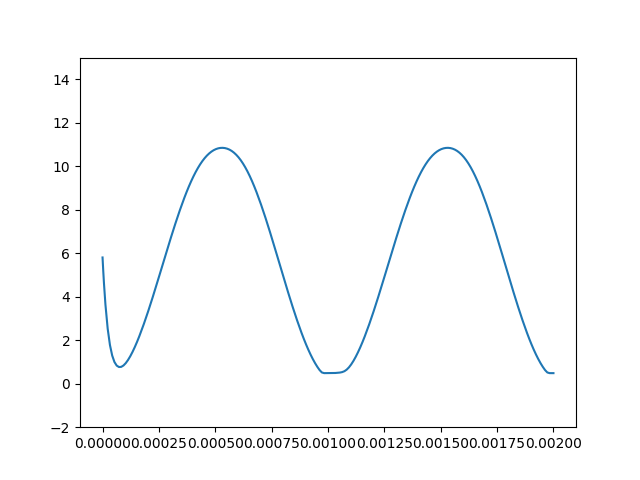

interactive(children=(FloatSlider(value=6000.0, description='w', max=50000.0, min=1000.0, step=1000.0), FloatS…

In [12]:
cir = circuit()
cir.getInstanceVal('ccouple')
cir.setInstanceVal('ccouple', 20e-9)
cir.netlist
cir.runSim()

#get the data
dat = data()
dat.extract()

#Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(dat.x, dat.y)
plt.ylim(-2, 15)

def update(w=2e3, g=10, remt=1e3):
    cir.setInstanceVal('rbias2', w)
    cir.setInstanceVal('ccouple', g*1e-9)
    cir.setInstanceVal('remitter', remt)
    cir.runSim()
    dat.readdat(dat.path)
    dat.extract()
    line.set_ydata(dat.y)
    fig.canvas.draw_idle()

wg1 = widgets.FloatSlider(min=1*1e3, max=50*1e3, step=1*1e3, value=6*1e3)
wg2 = widgets.FloatSlider(min=0.1, max=30, step=0.3, value=3)
remitter = widgets.FloatSlider(min=0.1*1e3, max=3*1e3, step=0.1*1e3, value=1*1e3)
interact(update, w=wg1, g=wg2, remt = remitter);

In [12]:
cir.netlist

['* This circuit contains only Berkeley SPICE3 components.\n',
 '*\n',
 '* The circuit is an AC coupled transistor amplifier with\n',
 '* a sinewave input at node "1", a gain of approximately -3.9, * and output on node "coll".\n',
 '*\n',
 '.tran 1e-5 2e-3\n',
 '*.dc vcc 0 15 0.1\n',
 '*\n',
 'vcc vcc 0 12.0\n',
 'vin 1 0 0.0 ac 1.0 sin(0 1 1k)\n',
 'ccouple 1 base 7.6e-08\n',
 'rbias1 vcc base 100k\n',
 'rbias2 base 0 24k\n',
 'q1 coll base emit generic\n',
 'rcollector vcc coll 3.9k\n',
 'remitter emit 0 1k\n',
 '*\n',
 '.model generic npn\n',
 '*.print dc coll\n',
 '.print tran coll\n',
 '* \n',
 '.end\n']